In [1]:
# !pip install cirq

In [2]:
import cirq
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
pi= np.pi

In [3]:
k=4
toBinary= lambda x,size:bin(x)[2:].zfill(size)
toDecimal= lambda binary_num: int(binary_num, 2)

In [4]:
qubits=cirq.NamedQubit.range(k,prefix='q')
circuit=cirq.Circuit()
sim=cirq.Simulator()
auxqubits=cirq.NamedQubit.range(1,prefix="aux")

In [5]:
def prepareAnicilia():
  circuit=cirq.Circuit()
  circuit.append(cirq.X(auxqubits[0]))
  circuit.append(cirq.H(auxqubits[0]))
  return circuit

In [6]:
#inversion and reflection (diffusion) operator
def oracle(marked):
  circuit=cirq.Circuit()
  global qubits
  global auxqubits
  for mar in marked:
    ctrl_state=toBinary(mar,k)
    for j,data in enumerate(ctrl_state):
        if data=='0':
          circuit.append(cirq.X(qubits[j]))
    circuit.append(cirq.X(auxqubits[0]).controlled_by(*qubits))

    for j,data in enumerate(ctrl_state):
      if data=='0':
        circuit.append(cirq.X(qubits[j]))
  return circuit


def reflection(marked):
  circuit=cirq.Circuit()
  global qubits
  global auxqubits

  circuit.append(cirq.H.on_each(*qubits))

  circuit=circuit+oracle([0])

  circuit.append(cirq.H.on_each(*qubits))
  return circuit

In [7]:
def applyGrover(n,marked):
  global circuit
  k=len(marked)
  theta = np.arcsin(np.sqrt(k/n))%(2*np.pi)
  k = np.pi/(4*theta)-0.5
  k = int(np.ceil(k))
  circuit.append(cirq.H.on_each(qubits))
  for _ in range(k):
    circuit=circuit+oracle(marked)
    circuit=circuit+reflection(marked)


In [8]:
def getlessThan(value,list):
  marked=[i for i in list if i < value]
  N = 2**4
  global circuit
  print(marked)
  circuit=cirq.Circuit()
  circuit=circuit+prepareAnicilia()
  applyGrover(N,marked)
  print(circuit)

[1, 2, 4, 5, 7, 8]
aux0: ───X───H───────X───────────X───────────X───────────X───────────X───────X───────────────X───────────
                     │           │           │           │           │       │               │
q0: ─────H───────X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───@───────H───X───@───X───H───
                     │           │           │           │           │       │               │
q1: ─────H───────X───@───X───X───@───X───────@───────────@───────────@───X───@───X───H───X───@───X───H───
                     │           │           │           │           │       │               │
q2: ─────H───────X───@───X───────@───X───────@───X───X───@───X───────@───X───@───X───H───X───@───X───H───
                     │           │           │           │           │       │               │
q3: ─────H───────────@───X───────@───X───X───@───X───────@───────────@───X───@───X───H───X───@───X───H───
aux0: ───X───H───────X───────────X───────────X───────────X───────────X─

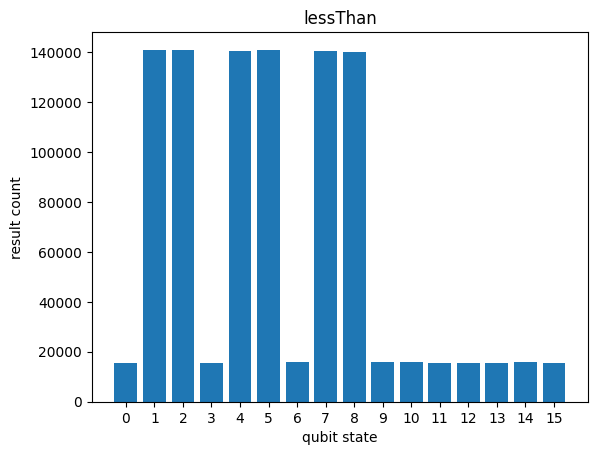

In [9]:
a=[1,2,4,5,7,8,9,10,11,12]
getlessThan(9,a)

print(circuit)
circuit.append(cirq.measure(qubits,key='lessThan'))
result = sim.run(circuit, repetitions=1000000)
custom_histogram = result.histogram(key = 'lessThan')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="lessThan")
plt.show()

[1, 2, 4, 5, 7]
aux0: ───X───H───────X───────────X───────────X───────────X───────────X───────────────X───────────
                     │           │           │           │           │               │
q0: ─────H───────X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───H───X───@───X───H───
                     │           │           │           │           │               │
q1: ─────H───────X───@───X───X───@───X───────@───────────@───────────@───────H───X───@───X───H───
                     │           │           │           │           │               │
q2: ─────H───────X───@───X───────@───X───────@───X───X───@───X───────@───────H───X───@───X───H───
                     │           │           │           │           │               │
q3: ─────H───────────@───X───────@───X───X───@───X───────@───────────@───────H───X───@───X───H───
aux0: ───X───H───────X───────────X───────────X───────────X───────────X───────────────X───────────
                     │           │           │  

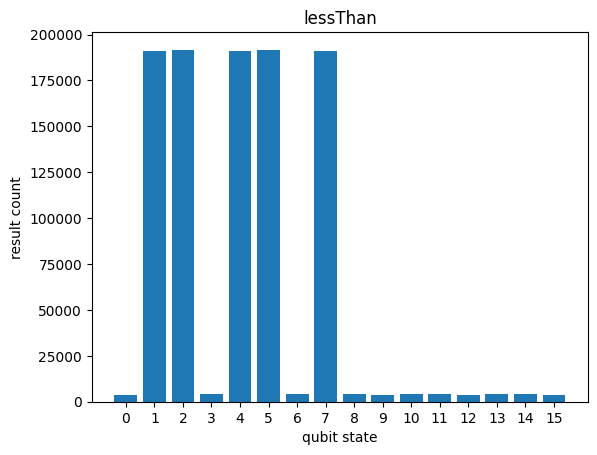

In [10]:
a=[1,2,4,5,7,8,9,10,11,12]
getlessThan(8,a)

print(circuit)
circuit.append(cirq.measure(qubits,key='lessThan'))
result = sim.run(circuit, repetitions=1000000)
custom_histogram = result.histogram(key = 'lessThan')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="lessThan")
plt.show()

[1, 2, 4, 5, 7, 8, 9]
aux0: ───X───H───────X───────────X───────────X───────────X───────────X───────X───────────X───────────────X───────────
                     │           │           │           │           │       │           │               │
q0: ─────H───────X───@───X───X───@───X───X───@───X───X───@───X───X───@───X───@───────────@───────H───X───@───X───H───
                     │           │           │           │           │       │           │               │
q1: ─────H───────X───@───X───X───@───X───────@───────────@───────────@───X───@───X───X───@───X───H───X───@───X───H───
                     │           │           │           │           │       │           │               │
q2: ─────H───────X───@───X───────@───X───────@───X───X───@───X───────@───X───@───X───X───@───X───H───X───@───X───H───
                     │           │           │           │           │       │           │               │
q3: ─────H───────────@───X───────@───X───X───@───X───────@───────────@───X───@

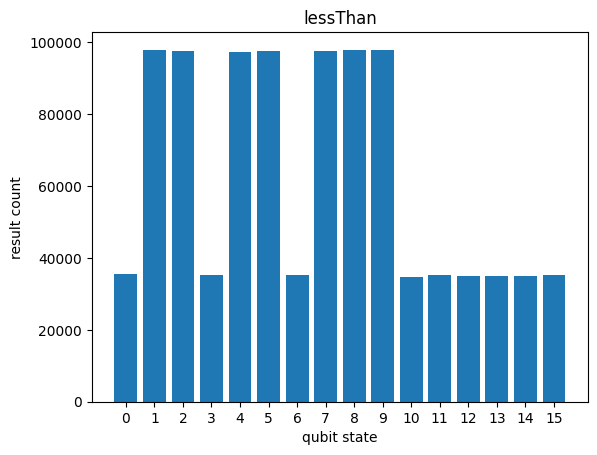

In [11]:
a=[1,2,4,5,7,8,9,10,11,12]
getlessThan(10,a)

print(circuit)
circuit.append(cirq.measure(qubits,key='lessThan'))
result = sim.run(circuit, repetitions=1000000)
custom_histogram = result.histogram(key = 'lessThan')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="lessThan")
plt.show()

[1]
aux0: ───X───H───────X───────────────X───────────────X───────────────X───────────────X───────────────X───────────
                     │               │               │               │               │               │
q0: ─────H───────X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───
                     │               │               │               │               │               │
q1: ─────H───────X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───
                     │               │               │               │               │               │
q2: ─────H───────X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───X───@───X───H───
                     │               │               │               │               │               │
q3: ─────H───────────@───────H───X───@───X───H───────@───────H───X───@───X───H───────@───────H───X───@───X───H───
aux0: ───X───H

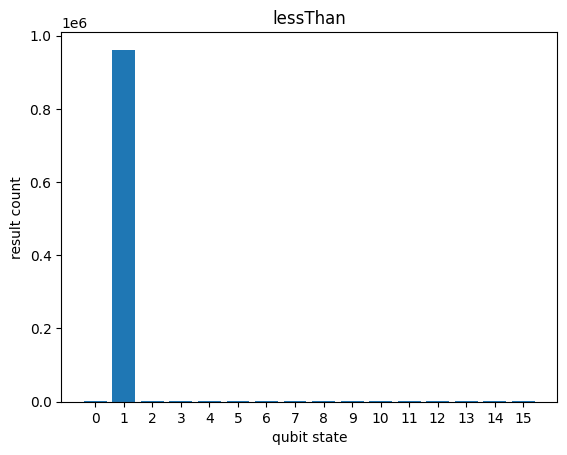

In [12]:
a=[1,2,4,5,7,8,9,10,11,12]
getlessThan(2,a)

print(circuit)
circuit.append(cirq.measure(qubits,key='lessThan'))
result = sim.run(circuit, repetitions=1000000)
custom_histogram = result.histogram(key = 'lessThan')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="lessThan")
plt.show()

[1, 2]
aux0: ───X───H───────X───────────X───────────────X───────────────X───────────X───────────────X───────────
                     │           │               │               │           │               │
q0: ─────H───────X───@───X───X───@───X───H───X───@───X───H───X───@───X───X───@───X───H───X───@───X───H───
                     │           │               │               │           │               │
q1: ─────H───────X───@───X───X───@───X───H───X───@───X───H───X───@───X───X───@───X───H───X───@───X───H───
                     │           │               │               │           │               │
q2: ─────H───────X───@───X───────@───────H───X───@───X───H───X───@───X───────@───────H───X───@───X───H───
                     │           │               │               │           │               │
q3: ─────H───────────@───X───────@───X───H───X───@───X───H───────@───X───────@───X───H───X───@───X───H───
aux0: ───X───H───────X───────────X───────────────X───────────────X───────────X─────

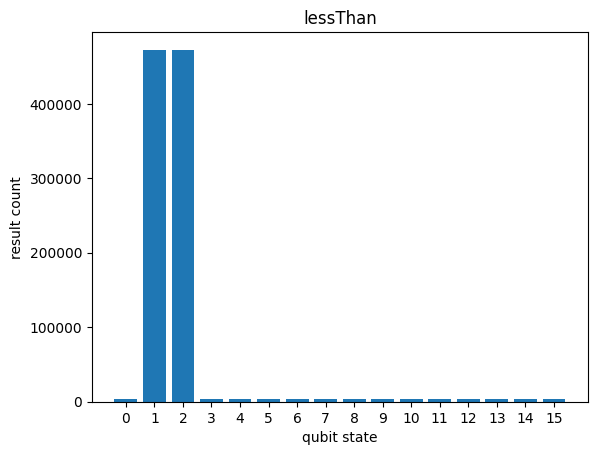

In [13]:
a=[1,2,4,5,7,8,9,10,11,12]
getlessThan(3,a)

print(circuit)
circuit.append(cirq.measure(qubits,key='lessThan'))
result = sim.run(circuit, repetitions=1000000)
custom_histogram = result.histogram(key = 'lessThan')

cirq.plot_state_histogram(custom_histogram, plt.subplot(),title="lessThan")
plt.show()